In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Example digit:


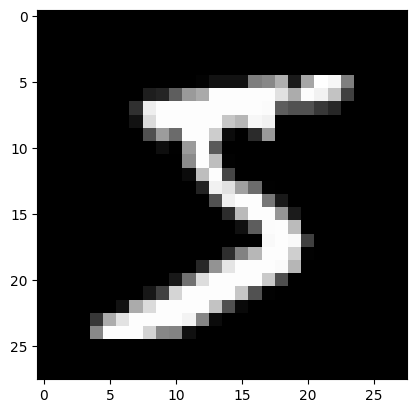

Label for the above digit is: 5


In [2]:
# Load the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Let's see an example digit
print("Example digit:")
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(f"Label for the above digit is: {y_train[0]}")

In [3]:
# Reshape data to fit the model input (add a channel dimension)
# MNIST images are grayscale, so the channel dimension is 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert data type to float32 and normalize values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"\nTraining data shape: {x_train.shape}")
print(f"{x_train.shape[0]} train samples")
print(f"{x_test.shape[0]} test samples")


Training data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    # 1st Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    # 2nd Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 2D feature maps to a 1D vector
    Flatten(),

    # Add a Dropout layer to prevent overfitting
    Dropout(0.5),

    # Fully connected layer
    Dense(128, activation='relu'),

    # Output layer with 10 units (for 10 digits) and softmax activation
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8292 - loss: 0.5560 - val_accuracy: 0.9788 - val_loss: 0.0660
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9723 - loss: 0.0902 - val_accuracy: 0.9868 - val_loss: 0.0393
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9810 - loss: 0.0623 - val_accuracy: 0.9882 - val_loss: 0.0348
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accuracy: 0.9899 - val_loss: 0.0296
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9918 - val_loss: 0.0249
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9914 - val_loss: 0.0252
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9916 - val_loss: 0.0239
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Save the entire model to a HDF5 file.
# The .h5 extension indicates that the model should be saved in the Keras format.
model.save('mnist_cnn.h5')

print("\nModel saved as mnist_cnn.h5")

Test loss: 0.024281999096274376
Test accuracy: 0.9921000003814697

Model saved as mnist_cnn.h5. You can now download it from the Colab file browser (left panel).
